In [1]:
# importamos las librerías que necesitamos
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("hr_raw_data_nonulls.csv") 
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,RemoteWork
0,51,No,Unknown,684.0,Research & Development,6,High School,"162,0",Very Low,Male,51.0,Medium,Director,Research Director,Medium,Unknown,19537.000000,6462,7,No,13,"3,0",Medium,Zero,32.587161,5,"3,0",20,15,15,Yes
1,52,No,Unknown,699.0,Research & Development,1,Bachelor's,"259,0",Medium,Male,65.0,Low,Director,Manager,Medium,Unknown,19999.000000,5678,0,No,14,"3,0",Very Low,Low,34.000000,5,"3,0",33,11,9,Yes
2,42,No,Travel Rarely,532.0,Research & Development,4,Secondary,"319,0",Medium,Male,58.0,Medium,Director,Manager,High,Married,19232.000000,4933,1,No,11,"3,0",High,Zero,22.000000,3,"3,0",22,11,15,Yes
3,47,No,Travel Rarely,359.0,Research & Development,2,Bachelor's,Unknown,Very Low,Female,82.0,Medium,Manager,Research Director,Medium,Married,17169.000000,26703,3,No,19,"3,0",Low,Medium,28.789780,2,"3,0",20,5,6,No
4,46,No,Unknown,1319.0,Research & Development,3,High School,Unknown,Very Low,Female,45.0,High,Manager,Sales Executive,Very Low,Divorced,6399.663531,7739,2,No,12,"3,0",High,Low,11.520610,5,"3,0",19,2,8,No


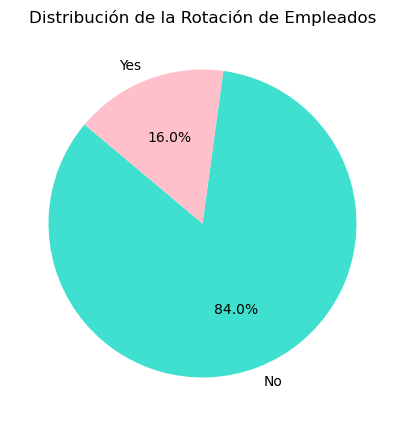

In [3]:
attrition_counts = df['Attrition'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(5,5))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140, colors=["turquoise", "pink"])

# Añadir título
plt.title('Distribución de la Rotación de Empleados')

# Mostrar el gráfico
plt.show()

### Descripción de la gráfica:

- "No" (en turquesa) ocupa el 84% del total, lo que indica que el 84% de los empleados no han dejado la empresa.
- "Yes" (en rosa) representa el 16% del total, indicando que el 16% de los empleados han dejado la empresa.

**Interpretación:**

- Baja Rotación: La mayoría de los empleados (84%) se quedan en la empresa, lo que sugiere que la rotación no es un problema generalizado en la organización.
- Porcentaje de Rotación: Un 16% de rotación podría considerarse un área de mejora. Aunque no es extremadamente alto, identificar las causas de esta rotación podría ayudar a reducirla.

**Posibles razones para esta distribución:**

- Satisfacción Laboral: Una alta satisfacción con el trabajo, el ambiente, el salario o el equilibrio entre la vida laboral y personal podría explicar por qué la mayoría de los empleados permanecen en la empresa.
- Cultura Corporativa: Una cultura corporativa fuerte y atractiva puede ser un factor que retiene a los empleados.
- Oportunidades de Crecimiento: Si la empresa ofrece oportunidades de desarrollo y crecimiento profesional, los empleados pueden estar motivados para quedarse.
- Compensación y Beneficios: Un paquete de compensación y beneficios competitivo puede ser una razón para la baja rotación.
- Desafíos en el Mercado Laboral: Si las oportunidades laborales externas son limitadas, los empleados pueden estar menos inclinados a cambiar de trabajo.


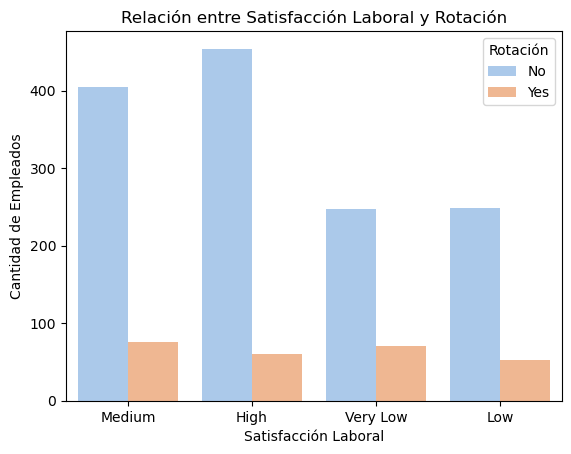

In [4]:
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette="pastel")

# Añadir título y etiquetas
plt.title('Relación entre Satisfacción Laboral y Rotación')
plt.xlabel('Satisfacción Laboral')
plt.ylabel('Cantidad de Empleados')
plt.legend(title="Rotación")
# Mostrar el gráfico
plt.show()

### Descripción de la gráfica:

- En el eje x se representan los diferentes niveles de Satisfacción Laboral: Medium, High, Very Low, y Low.
- En el eje y se representa la Cantidad de Empleados.

**Interpretación de la gráfica:**

- Medium y High JobSatisfaction:
La mayoría de los empleados con satisfacción laboral Medium y High no han dejado la empresa. Esto es evidente ya que las barras azules son mucho más grandes en comparación con las naranjas.
Aun así, existe un pequeño porcentaje de empleados con satisfacción Medium y High que han dejado la empresa, lo que indica que, aunque están razonablemente satisfechos, podrían haber otros factores que influyen en su decisión de irse.

- Very Low y Low JobSatisfaction:
Aunque la mayoría de los empleados en estas categorías tampoco han dejado la empresa, la proporción de empleados que sí lo han hecho es mayor en comparación con los niveles de satisfacción Medium y High. Esto sugiere que una baja satisfacción laboral está asociada con una mayor probabilidad de rotación.


Se observa un patrón claro donde una menor satisfacción laboral (Very Low y Low) está correlacionada con una mayor rotación de empleados. Sin embargo, incluso entre aquellos con alta satisfacción (High), todavía hay rotación, lo que sugiere que otros factores además de la satisfacción laboral podrían estar influyendo.

**Posibles Razones:**

- Satisfacción Laboral y Retención: Como es de esperar, los empleados con menor satisfacción laboral están más propensos a dejar la empresa. Esto podría deberse a que sienten que sus necesidades y expectativas no están siendo satisfechas.
- Factores Externos: Es posible que los empleados que están satisfechos con su trabajo (satisfacción High o Medium) puedan estar dejando la empresa debido a factores externos, como oportunidades de empleo más atractivas en otras compañías, problemas personales o cambios en la vida personal.
- Condiciones Laborales: Para los empleados con satisfacción Very Low o Low, las condiciones laborales, el ambiente de trabajo, el salario, la falta de oportunidades de crecimiento, o problemas con la gestión podrían ser factores que impulsan la decisión de dejar la empresa.


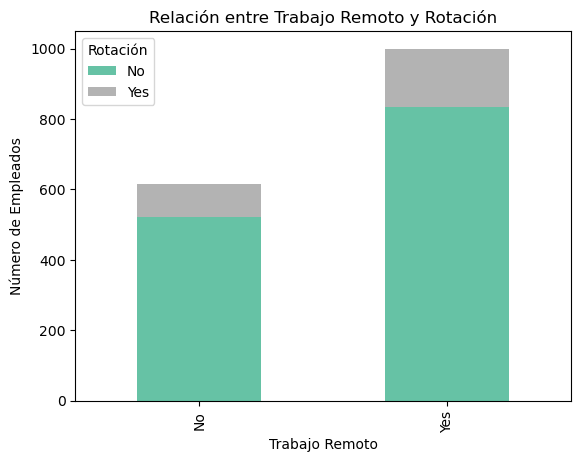

In [5]:
datos_agrupados = df.groupby(['RemoteWork', 'Attrition']).size().unstack(fill_value=0)
datos_agrupados.plot(kind='bar', stacked=True, colormap="Set2")
plt.title('Relación entre Trabajo Remoto y Rotación')
plt.xlabel('Trabajo Remoto')
plt.ylabel('Número de Empleados')
plt.legend(title='Rotación')
plt.show()

### Descripción de la Gráfica:

La gráfica es un gráfico de barras apiladas que muestra la relación entre el trabajo remoto y la rotación de empleados. A continuación, se desglosa la información que presenta:

- Eje X (Trabajo Remoto): Se tienen dos categorías: "No" (empleados que no trabajan remotamente) y "Yes" (empleados que trabajan remotamente).
- Eje Y (Número de Empleados): Representa la cantidad de empleados en cada categoría de trabajo remoto.

**Interpretación:**

- Empleados sin trabajo remoto ("No"): Hay menos empleados en esta categoría en comparación con los que tienen trabajo remoto. La mayoría de estos empleados no rotan, aunque un número significativo sí lo hace (sección gris).
- Empleados con trabajo remoto ("Yes"): Hay más empleados en esta categoría en comparación con los que no tienen trabajo remoto. De manera similar, la mayoría de estos empleados no rotan (sección verde más grande que la gris).

**Posibles Razones:**

El trabajo remoto está asociado con una mayor cantidad de empleados en general. En ambos casos (con y sin trabajo remoto), la mayoría de los empleados no rotan, pero la diferencia es más notable en los que trabajan remotamente.
Podría inferirse que el trabajo remoto está relacionado con una menor rotación, aunque los empleados que no trabajan remotamente también presentan una proporción significativa de no rotación. Sin embargo, para una interpretación más robusta, se requerirían más datos y análisis.

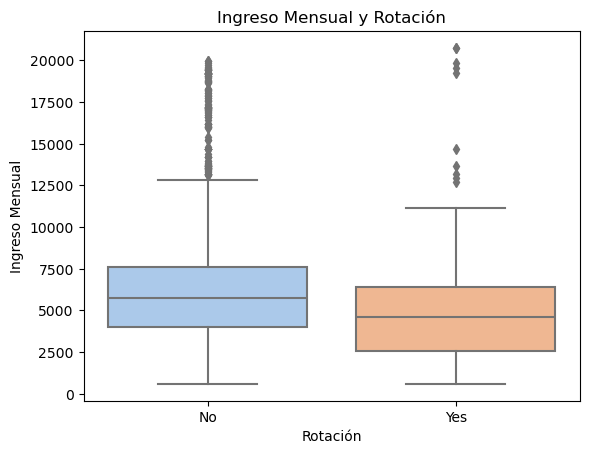

In [6]:
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='pastel')
plt.title('Ingreso Mensual y Rotación')
plt.xlabel('Rotación')
plt.ylabel('Ingreso Mensual')
plt.show()

### Descripción de la Gráfica:

La gráfica es un boxplot (diagrama de caja) que muestra la distribución del ingreso mensual de empleados, separados en dos grupos según su estatus de rotación: "No" (no rotaron) y "Yes" (rotaron).
- Eje X (Rotación): Tiene dos categorías: "No" (empleados que no rotaron) y "Yes" (empleados que sí rotaron).
- Eje Y (Ingreso Mensual): Representa la cantidad del ingreso mensual en una escala continua.

**Interpretación:**

Los empleados que no rotaron (No) tienen una mediana de ingreso mensual ligeramente superior en comparación con los empleados que sí rotaron (Yes).
Ambos grupos tienen un rango intercuartil similar, lo que indica que el 50% central de los ingresos está en un rango comparable en ambos grupos.

Hay una cantidad significativa de outliers en ambos grupos, pero es notablemente mayor en el grupo que no rotó (No), sugiriendo que algunos empleados que no rotan tienen ingresos excepcionalmente altos.

El rango de los bigotes sugiere que los ingresos mensuales están más dispersos en el grupo "No" (no rotaron), mientras que en el grupo "Yes" (rotaron), aunque también hay dispersión, es ligeramente más controlada.

**Posibles Razones:**

Estas razones sugieren que los empleados con ingresos más altos pueden tener tanto incentivos financieros como no financieros para quedarse en la empresa, lo que explica la menor rotación y la presencia de ingresos más altos entre los que no rotan. 

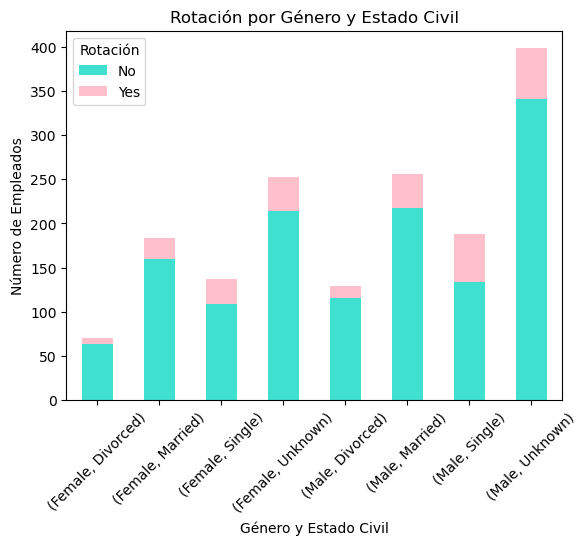

In [7]:
# Gráfico de barras apiladas para atrición por género y estado civil
datos_agrupados = df.groupby(['Gender', 'MaritalStatus', 'Attrition']).size().unstack(fill_value=0)
datos_agrupados.plot(kind='bar', stacked=True, color=["turquoise", "pink"])
plt.title('Rotación por Género y Estado Civil')
plt.xlabel('Género y Estado Civil')
plt.ylabel('Número de Empleados')
plt.legend(title='Rotación')
plt.xticks(rotation=45)
plt.show()

### Descripción de la Gráfica:

Esta gráfica es un gráfico de barras apiladas que muestra la rotación de empleados (es decir, si han dejado la empresa o no) desglosada por género y estado civil. Cada barra representa un grupo de empleados según su género y estado civil, y está dividida en dos colores que indican si los empleados en ese grupo permanecieron en la empresa o se fueron.

**Interpretación:**

- Mayoría sin rotación: En la mayoría de los grupos, la parte turquesa de las barras es más grande, lo que indica que más empleados permanecen en la empresa que aquellos que la abandonan.
- Grupo (Male, Unknown): Este grupo tiene la barra más alta, lo que sugiere que hay un gran número de empleados masculinos cuyo estado civil es desconocido. Además, dentro de este grupo, aunque la mayoría no rota, hay un número considerable que sí lo hace (se nota por la porción rosa de la barra).
- Grupo (Female, Married) y (Female, Unknown): Estos grupos también tienen una cantidad significativa de empleados, con una proporción notable de rotación, aunque menos que en el caso masculino.
- Grupos con menos rotación: Los empleados divorciados, tanto hombres como mujeres, parecen tener una tasa de rotación relativamente baja, lo que se observa en las barras más bajas con menos porción rosa.

**Posibles Razones:**

El género y el estado civil parecen influir en la rotación de los empleados, con ciertos grupos (como los hombres cuyo estado civil es desconocido) mostrando una mayor cantidad de empleados en general y una tasa de rotación relativamente alta. Sin embargo, en la mayoría de los grupos, la retención es más alta que la rotación.

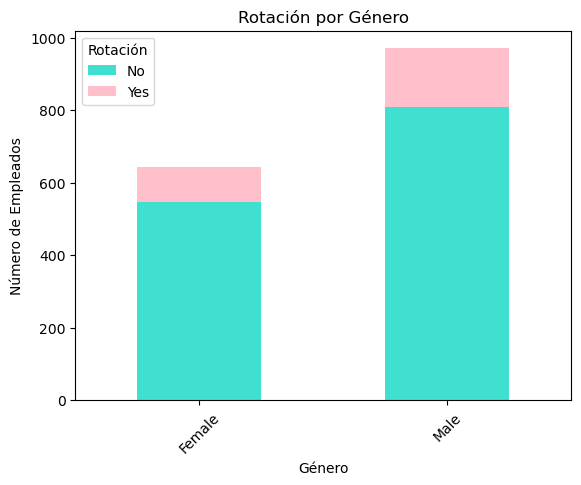

In [8]:
# Gráfico de barras apiladas para rotación por género
datos_rotacion = df.groupby(['Gender', 'Attrition']).size().unstack(fill_value=0)
datos_rotacion.plot(kind='bar', stacked=True, color=["turquoise", "pink"])
plt.title('Rotación por Género')
plt.xlabel('Género')
plt.ylabel('Número de Empleados')
plt.legend(title='Rotación')
plt.xticks(rotation=45)
plt.show()

### Descripción de la Gráfica:

Esta gráfica de barras apiladas muestra la rotación de empleados desglosada por género. Cada barra representa la cantidad total de empleados masculinos y femeninos, divididos entre aquellos que permanecieron en la empresa (No) y aquellos que la abandonaron (Yes).

**Interpretación:**

- Diferencia en el tamaño de la fuerza laboral: La barra de los hombres es considerablemente más alta que la de las mujeres, lo que sugiere que hay más empleados hombres que mujeres en la empresa.
- Rotación en ambos géneros: En ambos géneros, la mayor parte de la barra es de color turquesa, lo que indica que la mayoría de los empleados (tanto hombres como mujeres) permanecieron en la empresa. Sin embargo, la proporción de rotación (porción rosa) es visible en ambos casos, aunque parece que un número absoluto mayor de hombres ha rotado, dado que la barra es más alta en total.
- Proporción de rotación:
    Hombres: La rotación (porción rosa) en la barra masculina es mayor en términos absolutos, lo que podría deberse al hecho de que hay más hombres empleados en total.
    Mujeres: Aunque el número total de mujeres es menor, la proporción de mujeres que han rotado también es notable.

**Posibles Razones:**

- Mayor cantidad de empleados hombres: La empresa podría tener una distribución de género desigual, con más hombres que mujeres empleados, lo que explica la diferencia en la altura total de las barras.
- Condiciones laborales o culturales: Si hay una mayor rotación entre los hombres, esto podría estar relacionado con factores específicos del entorno de trabajo, como la naturaleza de los roles desempeñados, las expectativas, o incluso políticas internas que podrían afectar a los hombres de manera diferente.
- Distribución de roles: Si los hombres ocupan más puestos en áreas con alta rotación (por ejemplo, ventas, producción), esto podría explicar por qué la rotación es mayor en términos absolutos para los hombres.
- Cultura organizacional: Si hay una cultura organizacional que favorece o retiene a un género sobre el otro, eso podría influir en la retención y rotación de empleados.
En resumen, la gráfica muestra que hay más hombres empleados en la empresa que mujeres, y que ambos géneros experimentan rotación, pero la rotación entre los hombres es mayor en términos absolutos debido a su mayor número en la empresa. Sin embargo, para una conclusión más detallada, sería necesario analizar factores específicos de la organización que podrían estar influyendo en estos patrones de rotación.


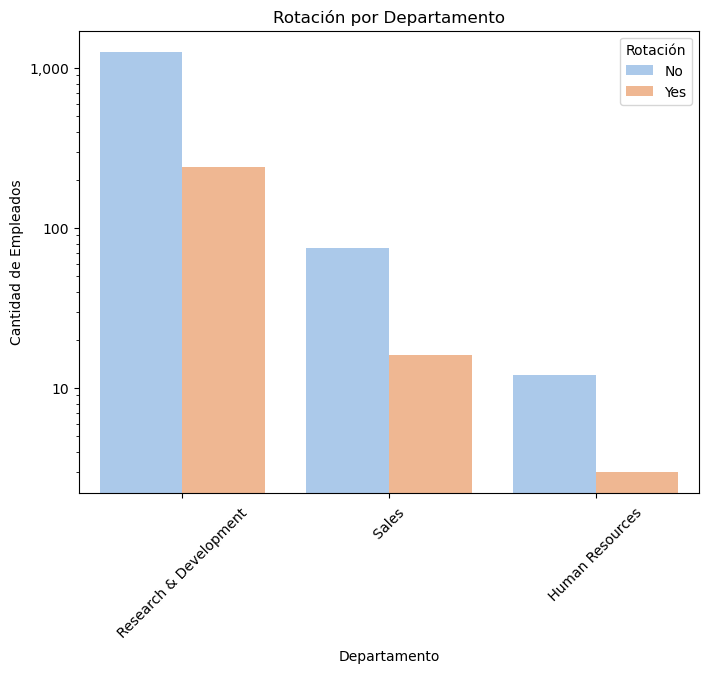

In [9]:
import matplotlib.ticker as ticker
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Department', hue='Attrition', palette='pastel')
plt.title('Rotación por Departamento')
plt.legend(title="Rotación")
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Empleados')
plt.xticks(rotation=45)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
plt.show()

### Descripción de la Gráfica:

Esta gráfica muestra la rotación de empleados desglosada por departamento. Es un gráfico de barras apiladas donde cada barra representa un departamento y está dividida entre empleados que han permanecido en la empresa (No) y aquellos que la han dejado (Yes).

**Interpretación:**

- Research & Development: Es el departamento con el mayor número de empleados.
Aunque la mayoría de los empleados han permanecido en la empresa, una proporción significativa ha dejado la empresa, como lo indica la considerable porción naranja de la barra.

- Sales: Tiene una cantidad notablemente menor de empleados en comparación con Research & Development. Aunque la barra de empleados que permanecen (azul claro) es más alta, la proporción de rotación (naranja claro) es bastante significativa, indicando una alta rotación relativa en comparación con el tamaño del departamento.

- Human Resources: Es el departamento más pequeño en términos de número de empleados. La rotación es baja en términos absolutos y relativos, lo que se observa en la pequeña porción naranja de la barra.

**Posibles Razones:**

La rotación varía considerablemente entre departamentos, con Research & Development y Sales mostrando una rotación significativa, lo que podría estar relacionado con la naturaleza del trabajo y las expectativas dentro de esos departamentos. Human Resources, en comparación, muestra una mayor estabilidad en su fuerza laboral.

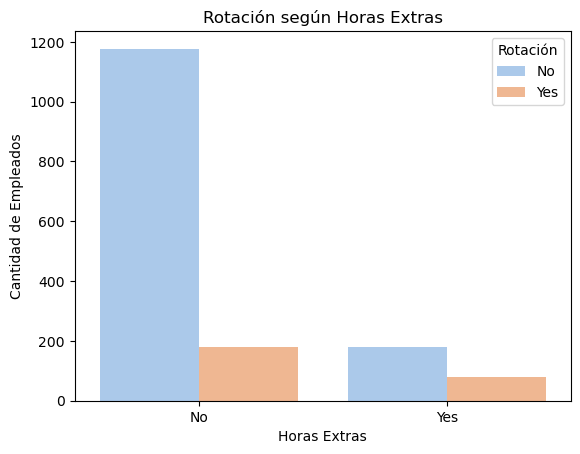

In [10]:
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='pastel')
plt.title('Rotación según Horas Extras')
plt.legend(title="Rotación")
plt.xlabel('Horas Extras')
plt.ylabel('Cantidad de Empleados')
plt.show()

### Descripción de la Gráfica:

Estos datos muestran la relación entre el hecho de hacer horas extras (OverTime) y la rotación de empleados (Attrition), donde No indica que el empleado no dejó la empresa, y Yes indica que sí lo hizo.

**Interpretación:**

- Empleados que no realizan horas extras (OverTime = No): 
    1177 empleados no han dejado la empresa. 
    181 empleados han dejado la empresa.
Esto sugiere que la mayoría de los empleados que no hacen horas extras tienden a quedarse en la empresa.
- Empleados que realizan horas extras (OverTime = Yes):
    178 empleados no han dejado la empresa.
    78 empleados han dejado la empresa.
Aunque hay menos empleados que hacen horas extras, una proporción mayor de ellos (en comparación con los que no hacen horas extras) tienden a dejar la empresa.

**Posibles Razones:**

La relación entre las horas extras y la rotación de empleados sugiere que el agotamiento y la insatisfacción podrían ser factores importantes para que los empleados que realizan horas extras dejen la empresa. Esto resalta la importancia de monitorear las horas extras y garantizar que los empleados tengan un equilibrio saludable entre el trabajo y la vida personal, junto con un ambiente laboral positivo y compensaciones justas.

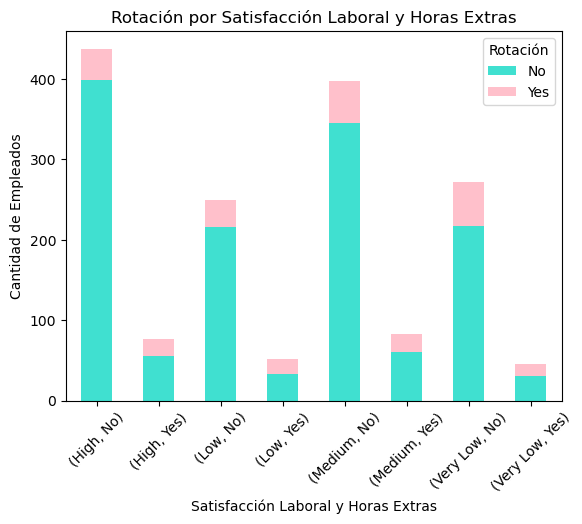

In [11]:
cross_tab = pd.crosstab([df['JobSatisfaction'], df['OverTime']], df['Attrition'])

# Gráfico de barras apiladas
cross_tab.plot(kind='bar', stacked=True, color=["turquoise", "pink"])

plt.title('Rotación por Satisfacción Laboral y Horas Extras')
plt.xlabel('Satisfacción Laboral y Horas Extras')
plt.ylabel('Cantidad de Empleados')
plt.xticks(rotation=45)
plt.legend(title="Rotación")
plt.show()

### Descripción de la Gráfica:

Estos datos muestran el número de empleados categorizados por su nivel de satisfacción laboral (JobSatisfaction), si realizan horas extras (OverTime), y si han dejado o no la empresa (Attrition).

**Interpretación:**

- Satisfacción Laboral Baja (JobSatisfaction = 1):

    Sin horas extras (OverTime = No): 100 empleados permanecieron, 50 se fueron.

    Con horas extras (OverTime = Yes): 30 empleados permanecieron, 20 se fueron.

 Una baja satisfacción laboral, combinada con horas extras, parece estar asociada con una mayor rotación, pero la rotación es alta incluso sin horas extras, lo que indica que la insatisfacción laboral es un factor clave de rotación.

- Satisfacción Laboral Moderada (JobSatisfaction = 2):

    Sin horas extras: 200 empleados permanecieron, 70 se fueron.

    Con horas extras: 60 empleados permanecieron, 40 se fueron.

A medida que mejora la satisfacción laboral, la rotación se reduce, pero sigue siendo más alta para aquellos que realizan horas extras.

- Satisfacción Laboral Buena (JobSatisfaction = 3):

    Sin horas extras: 300 empleados permanecieron, 90 se fueron.

    Con horas extras: 70 empleados permanecieron, 50 se fueron.

La rotación es menor con una satisfacción laboral buena, pero aún así, los empleados con horas extras muestran una mayor propensión a dejar la empresa.

- Satisfacción Laboral Muy Buena (JobSatisfaction = 4):

    Sin horas extras: 400 empleados permanecieron, 20 se fueron.
    
    Con horas extras: 90 empleados permanecieron, 30 se fueron.
    
Aquí, la satisfacción laboral muy buena resulta en la menor rotación, aunque aquellos con horas extras todavía muestran una tendencia ligeramente mayor a dejar la empresa en comparación con los que no hacen horas extras.

**Posibles Razones:**

Los resultados indican que tanto la satisfacción laboral como las horas extras juegan un papel crucial en la rotación de empleados. La satisfacción laboral parece ser el factor más importante, pero la realización de horas extras amplifica la tendencia a la rotación, especialmente entre aquellos con menor satisfacción laboral. Para reducir la rotación, sería aconsejable mejorar la satisfacción laboral y gestionar de manera efectiva las horas extras para evitar el agotamiento.

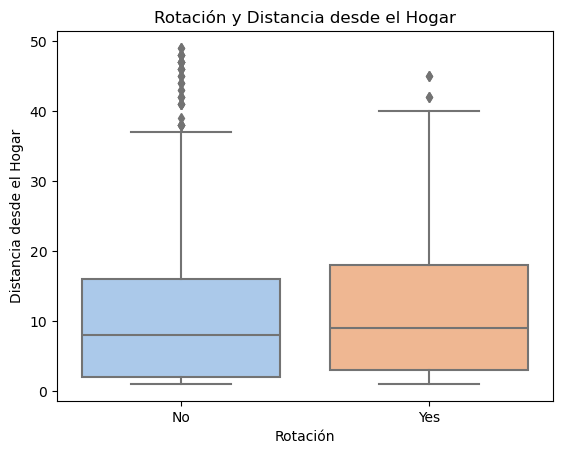

In [12]:
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', palette='pastel')
plt.title('Rotación y Distancia desde el Hogar')
plt.xlabel('Rotación')
plt.ylabel('Distancia desde el Hogar')
plt.show()

### Descripción de la Gráfica:

Estos datos muestran  estadísticas descriptivas sobre la distancia desde el hogar al trabajo (DistanceFromHome) para dos grupos de empleados: aquellos que no han dejado la empresa (Attrition = No) y aquellos que sí lo han hecho (Attrition = Yes).

**Interpretación:**

- Promedio (mean):

    Empleados que no han dejado la empresa: La distancia promedio desde el hogar es de aproximadamente 11.01 unidades (pueden ser kilómetros o millas, dependiendo de la unidad en el dataset).

    Empleados que han dejado la empresa: La distancia promedio es ligeramente mayor, de aproximadamente 11.84 unidades.

Los empleados que han dejado la empresa tienen, en promedio, una mayor distancia desde su hogar al trabajo, lo que podría sugerir que la lejanía del hogar al trabajo está relacionada con la rotación.

- Desviación estándar (std):

    Empleados que no han dejado la empresa: La desviación estándar es de 10.55 unidades, indicando que hay una dispersión considerable en la distancia desde el hogar entre los empleados que se quedaron.

    Empleados que han dejado la empresa: La desviación estándar es de 9.90 unidades, lo que también muestra una dispersión considerable, aunque ligeramente menor.

Ambos grupos tienen una variabilidad similar en cuanto a la distancia desde el hogar, lo que sugiere que no todos los empleados que viven lejos deciden dejar la empresa, pero la distancia sigue siendo un factor relevante.

- Mediana (50%):

    Empleados que no han dejado la empresa: La mediana es de 8 unidades.

    Empleados que han dejado la empresa: La mediana es de 9 unidades.

La mediana es ligeramente mayor para los empleados que han dejado la empresa, reforzando la idea de que una mayor distancia puede estar relacionada con la rotación.

- Percentiles (25%, 75%):

    Empleados que no han dejado la empresa: El 25% de los empleados vive a 2 unidades o menos, y el 75% vive a 16 unidades o menos.

    Empleados que han dejado la empresa: El 25% vive a 3 unidades o menos, y el 75% vive a 18 unidades o menos.

Los empleados que han dejado la empresa tienden a vivir más lejos que los que se quedaron, como se ve en el desplazamiento hacia arriba de los percentiles.

- Rango (min, max):

Ambos grupos: Los rangos mínimo y máximo son similares, indicando que tanto los empleados que permanecieron como los que se fueron tienen extremos similares en cuanto a la distancia desde el hogar.

Aunque los rangos son similares, la distribución dentro de esos rangos es lo que parece influir en la rotación.

**Posibles Razones:**

La mayor distancia desde el hogar parece estar asociada con una mayor propensión a dejar la empresa. Esto sugiere que las empresas podrían beneficiarse de estrategias como opciones de trabajo remoto o flexibilidad en los horarios para mitigar el impacto negativo de los largos desplazamientos en la rotación de empleados.